<a href="https://colab.research.google.com/github/mosmtilk222/Data-Analysis-Projects/blob/main/Houses_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
pd.__version__
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
STATES = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID',
          'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MS', 'MO', 'MT',
          'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'PR',
          'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'VI', 'WA', 'WV', 'WI', 'WY']

def to_int(x):
  if x == '':
    return np.NaN
  else:
    return int(x)

def price(x):
  try:
    x = x.replace('$', '')
    x = x.replace(' ', '')
    return int(x)
  except ValueError:
    return np.NaN

def whatever_to_sqft(x):
  try:
    if 'acres' in x:
      x = x.casefold()
      x = x.replace('acres', '')
      x = x.replace(' ', '')
      x = float(x)
      x = x * 43560
      return x

    elif 'sqft' in x:
      x = x.casefold()
      x = x.replace('sqft', '')
      x = x.replace(' ', '')
      return float(x)

    elif 'sqm' in x:
      x = x.casefold()
      x = x.replace('sqm', '')
      x = x.replace(' ', '')
      x = float(x)
      x = x * 10.764
      return x
  except ValueError:
    return np.NaN

def format_str(x):
  x = x.lower()
  x = x.replace('county', '')
  return x

def city(x):
  try:
    x = re.split(',', x)
    return x[0].lower()
  except IndexError:
    return pd.NA

def state(x):
  try:
    x = re.split(',', x)
    return x[1].upper()
  except IndexError:
    return pd.NA

In [ ]:
from sqlite3 import connect

conn = connect('database.db')

pd.options.display.float_format = '{:,.1f}'.format
df = pd.read_sql('SELECT * FROM \'Houses for sale\'', conn)
df.rename(columns= {'Price': 'Price (US Dollars)',
                     'Lot size': 'Lot size (sqft)',
                     'Living area': 'Living area (sqft)'
                     },
          inplace = True
          )

df

,Address,Price (US Dollars),County,Lot size (sqft),Bedrooms,Total bathrooms,Living area (sqft)
0,"Kirkland,AZ,United States",$4600000,Yavapai County,,3,3,4374sqft
1,"Paradise Valley,AZ,United States",$3100000,Maricopa County,1.38acres,2,3,2810sqft
2,"Austin,TX,United States",$1025000,Travis,,4,4,3592sqft
3,"Chandler,AZ,United States",$949999,Maricopa,,4,4,3235sqft
4,"Orlando,FL,United States",$535000,Orange,,3,4,1893sqft
...,...,...,...,...,...,...,...
11968,"Melbourne,FL,United States",$574900,,131551.0sqft,3,3,2082sqft
11969,"Melbourne,FL,United States",$709900,,131551.0sqft,3,3,2345sqft
11970,"Edmonds,WA,United States",$770000,Snohomish,604753.0sqft,2,,
11971,"Seattle,WA,United States",$889000,King,1677.0sqft,3,,1320sqft


In [ ]:
df['Price (US Dollars)'] = df['Price (US Dollars)'].apply(lambda x: price(x))
df['County'] = df['County'].apply(lambda x: format_str(x))
df['Bedrooms'] = df['Bedrooms'].apply(lambda x: to_int(x))
df['Lot size (sqft)'] = df['Lot size (sqft)'].apply(lambda x: whatever_to_sqft(x))
df['Total bathrooms'] = df['Total bathrooms'].apply(lambda x: to_int(x))
df['Living area (sqft)'] = df['Living area (sqft)'].apply(lambda x: whatever_to_sqft(x))
df['City'] = df['Address'].apply(lambda x: city(x))
df['State'] = df['Address'].apply(lambda x: state(x))
df.drop(['Address'], axis=1, inplace=True)
df

,Price (US Dollars),County,Lot size (sqft),Bedrooms,Total bathrooms,Living area (sqft),City,State
0,"4,600,000.0",yavapai,NaN,3.0,3.0,"4,374.0",kirkland,AZ
1,"3,100,000.0",maricopa,"60,112.8",2.0,3.0,"2,810.0",paradise valley,AZ
2,"1,025,000.0",travis,NaN,4.0,4.0,"3,592.0",austin,TX
3,"949,999.0",maricopa,NaN,4.0,4.0,"3,235.0",chandler,AZ
4,"535,000.0",orange,NaN,3.0,4.0,"1,893.0",orlando,FL
...,...,...,...,...,...,...,...,...
11968,"574,900.0",,"131,551.0",3.0,3.0,"2,082.0",melbourne,FL
11969,"709,900.0",,"131,551.0",3.0,3.0,"2,345.0",melbourne,FL
11970,"770,000.0",snohomish,"604,753.0",2.0,NaN,NaN,edmonds,WA
11971,"889,000.0",king,"1,677.0",3.0,NaN,"1,320.0",seattle,WA


In [ ]:
df = df.convert_dtypes()
df

,Price (US Dollars),County,Lot size (sqft),Bedrooms,Total bathrooms,Living area (sqft),City,State
0,4600000,yavapai,<NA>,3,3,"4,374.0",kirkland,AZ
1,3100000,maricopa,"60,112.8",2,3,"2,810.0",paradise valley,AZ
2,1025000,travis,<NA>,4,4,"3,592.0",austin,TX
3,949999,maricopa,<NA>,4,4,"3,235.0",chandler,AZ
4,535000,orange,<NA>,3,4,"1,893.0",orlando,FL
...,...,...,...,...,...,...,...,...
11968,574900,,"131,551.0",3,3,"2,082.0",melbourne,FL
11969,709900,,"131,551.0",3,3,"2,345.0",melbourne,FL
11970,770000,snohomish,"604,753.0",2,<NA>,<NA>,edmonds,WA
11971,889000,king,"1,677.0",3,<NA>,"1,320.0",seattle,WA


In [ ]:
df.dtypes

Price (US Dollars)      Int64
County                 string
Lot size (sqft)       Float64
Bedrooms                Int64
Total bathrooms         Int64
Living area (sqft)    Float64
City                   string
State                  string
dtype: object

In [ ]:
df.shape

(11973, 8)

In [ ]:
df.describe(include='all')

,Price (US Dollars),County,Lot size (sqft),Bedrooms,Total bathrooms,Living area (sqft),City,State
count,"11,956.0",11973,"3,886.0","11,435.0","10,652.0","8,960.0",11973,11874
unique,NaN,661,NaN,NaN,NaN,NaN,1978,47
top,NaN,,NaN,NaN,NaN,NaN,naples,CA
freq,NaN,1878,NaN,NaN,NaN,NaN,325,1740
mean,"2,185,867.6",NaN,"19,251,466.8",4.0,3.9,"11,615.2",NaN,NaN
std,"3,588,716.7",NaN,"388,038,958.2",1.6,2.2,"642,807.4",NaN,NaN
min,"469,000.0",NaN,1.0,1.0,1.0,1.0,NaN,NaN
25%,"765,000.0",NaN,"9,247.5",3.0,3.0,"2,082.0",NaN,NaN
50%,"1,180,000.0",NaN,"55,103.3",4.0,3.0,"2,959.0",NaN,NaN
75%,"2,199,000.0",NaN,"217,800.0",5.0,5.0,"4,336.2",NaN,NaN


In [ ]:
county = str(input('County: '))
df[(df['Price (US Dollars)'] > 490000) & (df['State'] == f'{county}') & (df['Bedrooms'] > 1)]

County: NY


,Price (US Dollars),County,Lot size (sqft),Bedrooms,Total bathrooms,Living area (sqft),City,State
19,589000,suffolk,<NA>,4,<NA>,<NA>,e. patchogue,NY
23,569999,suffolk,<NA>,3,1,<NA>,commack,NY
33,1150000,suffolk,<NA>,4,2,"2,100.0",shoreham,NY
35,699000,nassau,<NA>,3,2,<NA>,valley stream,NY
57,749000,nassau,<NA>,3,3,"2,145.0",woodbury,NY
...,...,...,...,...,...,...,...,...
11698,1950000,,<NA>,3,3,"2,400.0",new york,NY
11709,1325000,,<NA>,5,3,"4,137.0",scarsdale,NY
11714,3200000,,"87,120.0",10,5,"6,591.0",scarsdale,NY
11736,1500000,,<NA>,5,5,"5,729.0",west harrison,NY


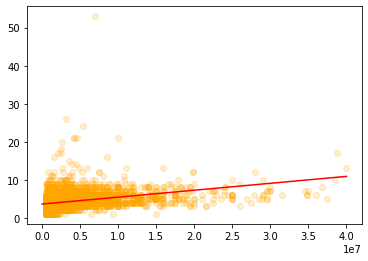

In [ ]:
valid_df = df[(df['Bedrooms'] >= 1) & (df['Price (US Dollars)'] <= 40000000)]
X = np.array(valid_df.iloc[:, 0].values)
Y = np.array(valid_df.iloc[:, 3].values)

plt.scatter(X, Y, alpha=0.2, c="orange")

X = np.array([np.ones(11407), X], dtype = np.float).T

B = np.linalg.inv(X.T @ X) @ X.T @ Y

plt.plot([1, 40000000], [B[0] + B[1] * 1, B[0] + B[1] * 40000000], c="red")
plt.show()